# Лабораторная работа №1. Логистическая регрессия в качестве нейронной сети

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Задание 1.
Загрузите данные и отобразите на экране несколько из изображений с помощью языка Python;

In [170]:
from utils.dataset import extract_dataset, download_dataset, read_dataset

dataset_url = "https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz"
dataset_path = extract_dataset(download_dataset(dataset_url))

In [174]:
img_height, img_width = 28, 28
classes = ["A","B","C","D","E","F","G","H","I","J"]
X, y = read_dataset(dataset_path, classes, img_height, img_width)

In [175]:
def draw_images(X, y, img_height, img_width):
    rand_index = np.random.randint(0, X.shape[1], 12)

    plt.figure(figsize=(10, 10))
    for i in range(len(rand_index)):
        img = X[:,rand_index[i]].reshape(img_height, img_width)

        plt.subplot(6, 6, i+1)
        plt.imshow(img, cmap='gray')

    plt.show()

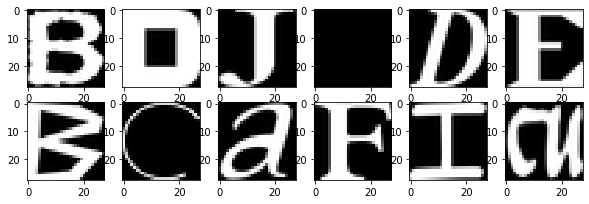

In [176]:
draw_images(X, y, img_height, img_width)

## Задание 2.
Проверьте, что классы являются сбалансированными, т.е. количество изображений, принадлежащих каждому из классов, примерно одинаково (В данной задаче 10 классов).

In [177]:
from collections import Counter
Counter(y[0])

Counter({8: 52912,
         6: 52912,
         0: 52909,
         5: 52912,
         7: 52912,
         9: 52911,
         2: 52912,
         3: 52911,
         4: 52912,
         1: 52911})

## Задание 3.
Разделите данные на три подвыборки: обучающую (200 тыс. изображений), валидационную (10 тыс. изображений) и контрольную (тестовую) (19 тыс. изображений);

In [178]:
from utils.dataset import split_dataset

X_train, X_val, X_test, Y_train, Y_val, Y_test = split_dataset(X, y, 200000, 10000, 19000)

## Задание 4.
Проверьте, что данные из обучающей выборки не пересекаются с данными из валидационной и контрольной выборок. Другими словами, избавьтесь от дубликатов в обучающей выборке.

In [179]:
import hashlib


def get_img_hash(img):
    return hashlib.sha256(img).hexdigest()


def remove_duplicates(ds1, ds1_labels, ds2):
    duplicated_images = np.intersect1d(ds1, ds2)
    
    ds1_cleaned, ds1_labels_cleaned = [], []
    for i in range(len(ds1)):
        if ds1[i] not in duplicated_images:
            ds1_cleaned.append(ds1[i])
            ds1_labels_cleaned.append(ds1_labels[i])

    return np.array(ds1_cleaned), np.array(ds1_labels_cleaned)

In [180]:
X_test, Y_test = remove_duplicates(X_test.T, Y_test.T, X_train.T)
X_val, Y_val = remove_duplicates(X_val.T, Y_val.T, X_train.T)

/Users/anton/Documents/Maga/master_mo_2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


## Задание 5
Постройте простейший классификатор (например, с помощью логистической регрессии). Постройте график зависимости точности классификатора от размера обучающей выборки (50, 100, 1000, 50000). Для построения классификатора можете использовать библиотеку SkLearn (http://scikit-learn.org).

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [184]:
val_scores, test_scores = [], []
for train_size in [50, 100, 1000, 50000]:
    base_model = LogisticRegression(solver="lbfgs",max_iter=1000)
    model = OneVsRestClassifier(base_model).fit(X_train[:, :train_size].T, Y_train[:, :train_size].T)

    val_scores.append(model.score(X_val, Y_val))
    test_scores.append(model.score(X_test, Y_test))

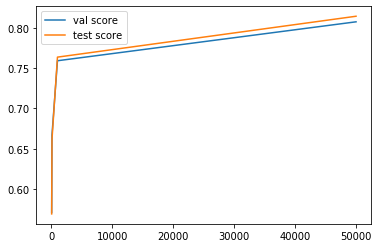

In [185]:
plt.plot([50, 100, 1000, 50000], val_scores, label="val score")
plt.plot([50, 100, 1000, 50000], test_scores, label="test score")
plt.legend()
plt.show()

In [188]:
test_scores[-1]

0.8143157894736842